<a href="https://colab.research.google.com/github/pratibha77118/23-Homework6G4/blob/integration_plots/exponential.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from pickle import TRUE
import numpy as np
def simpson(f, a, b, n):
    """Approximates the definite integral of f from a to b by
    the composite Simpson's rule, using n subintervals.
    From http://en.wikipedia.org/wiki/Simpson's_rule
    """
    h = (b - a) / n
    i = np.arange(0,n)

    s = f(a) + f(b)
    s += 4 * np.sum( f( a + i[1::2] * h ) )
    s += 2 * np.sum( f( a + i[2:-1:2] * h ) )

    return s * h / 3

def trapezoid(f, a, b, n):
    """Approximates the definite integral of f from a to b by
    the composite trapezoidal rule, using n subintervals.
    From http://en.wikipedia.org/wiki/Trapezoidal_rule
    """
    h = (b - a) / n
    s = f(a) + f(b)
    i = np.arange(0,n)
    s += 2 * np.sum( f(a + i[1:] * h) )
    return s * h / 2


def adaptive_trapezoid(f, a, b, acc, output=False):
    """
    Uses the adaptive trapezoidal method to compute the definite integral
    of f from a to b to desired accuracy acc.
    """
    old_s = np.inf
    h = b - a
    n = 1
    s = (f(a) + f(b)) * 0.5
    if output == True :
        print ("N = " + str(n+1) + ",  Integral = " + str( h*s ))
    while abs(h * (old_s - s*0.5)) > acc :
        old_s = s
        for i in np.arange(n) :
            s += f(a + (i + 0.5) * h)
        n *= 2.
        h *= 0.5
        if output == True :
            print ("N = " + str(n) + ",  Integral = " + str( h*s ))
    return h * s

In [ ]:
%%writefile calculas.py

Overwriting calculas.py


The result of the integration is: 9.573294094652049
Estimated error: 1.0320164160153193e-09
The approximate integral of f(x) from 1e-10 to 12.566370614359172 using simpson: 9.584045644179401
The approximate integral of f(x) from 1e-10 to 12.566370614359172 using trapezoid: 9.57979606679546
The approximate ntegral of f(x) from 1e-10 to 12.566370614359172 using adaptive trapezoid: 9.573226531625863
Accuracy of Simpson's rule: 2.9495903409332414 digits
Accuracy of trapezoid rule: 3.16801629627971 digits
Accuracy of adaptive trapezoid rule: 5.151352307158894 digits


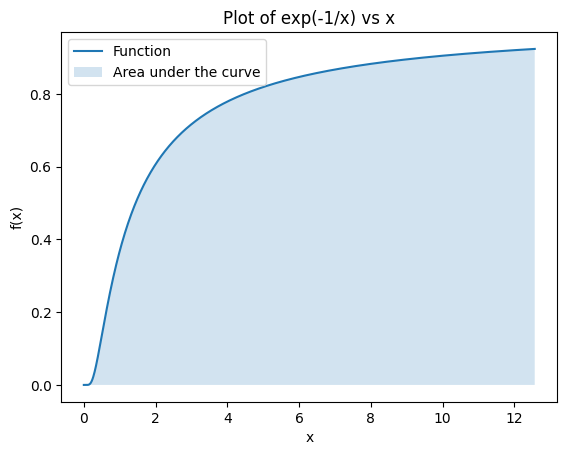

In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt
from math import pi
from scipy.integrate import quad

# Import the simpson function from calculus.py (assuming it's in the same directory)
from calculas import *


# Define the function to integrate
def f(x):
  safe_x = np.clip(x, 1e-10, np.inf)
  return np.where(x != 0, np.exp(-1/safe_x), 0)

# Define the integration bounds
a = 1e-10
b = 4 * math.pi  # Exclude the singularity at x = 0

# Define the number of subintervals
n = 20
# Perform the numerical integration
result, error = quad(f, a, b)

# Print the result
print(f"The result of the integration is: {result}")
print(f"Estimated error: {error}")

# Desired accuracy
desired_accuracy = 1e-3

# Use the simpson function to calculate the integral
result_simpson = simpson(f, a, b, n)

# Use the trapezoid function to calculate the integral
result_trapezoid = trapezoid(f, a, b, n)

# Perform adaptive trapezoidal integration
result_adaptive_trapezoid = adaptive_trapezoid(f, a, b, desired_accuracy, output=False)

# Calculate accuracies
accuracy_simpson = -math.log10(np.abs((result_simpson - result) / result))
accuracy_trapezoid = -math.log10(np.abs((result_trapezoid - result) / result))
accuracy_adaptive_trapezoid = -math.log10(np.abs((result_adaptive_trapezoid - result) / result))

print(f"The approximate integral of f(x) from {a} to {b} using simpson: {result_simpson}")
print(f"The approximate integral of f(x) from {a} to {b} using trapezoid: {result_trapezoid}")
print(f"The approximate ntegral of f(x) from {a} to {b} using adaptive trapezoid: {result_adaptive_trapezoid}")


# Print the results
print(f"Accuracy of Simpson's rule: {accuracy_simpson} digits")
print(f"Accuracy of trapezoid rule: {accuracy_trapezoid} digits")
print(f"Accuracy of adaptive trapezoid rule: {accuracy_adaptive_trapezoid} digits")

# Plot the function and the area under the curve
x_values = np.linspace(a, b, 1000)
y_values = f(x_values)

plt.plot(x_values, y_values, label='Function')
plt.fill_between(x_values, 0, y_values, alpha=0.2, label='Area under the curve')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.title('Plot of exp(-1/x) vs x')
plt.show()



